In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
% matplotlib inline

## Linear Regression
For the purposes of this tutorial, I will be generating a random set of data, with n number of features, and apply first principles of Linear Regression to obtain the coefficients for each features based on Least Squared Error Cost Function.

In [2]:
n_features = 10

# Generation of random datasets with n_features already fitted
data_x, data_y = datasets.make_regression(n_samples= 100,
                               n_features = n_features,
                               n_targets = 1,
                               noise = 100)

In [3]:
data_x = pd.DataFrame(data_x)
data_y = pd.DataFrame(data_y)
data_x.columns = ['x{}'.format(i) for i in range(n_features)]
data_y.columns=['y']
data = pd.concat([data_x, data_y], axis = 1)
print(data.head())

         x0        x1        x2        x3        x4        x5        x6  \
0 -1.159817 -0.486001 -1.654450 -1.272714 -1.289814  1.831900 -0.733321   
1 -0.115406  0.803215  0.212172 -0.180852  0.981211  1.146699 -1.801729   
2  2.494077  0.112900  1.147182 -0.921304 -1.350649  0.222877 -1.366437   
3 -0.328217  0.444896  0.584577  0.531156  0.947703 -1.314422 -1.217678   
4 -1.432157 -0.006213  0.344361  0.796117 -1.807530  0.776804 -1.656397   

         x7        x8        x9           y  
0 -1.065952 -0.736852 -0.543421 -442.941420  
1  0.459869  0.271187 -0.351378  164.312869  
2  1.111847  0.237793  0.589275  -12.190315  
3  1.438077 -0.223349 -0.064664  234.221257  
4 -1.442878 -1.310078 -0.347681 -394.428987  


## Cost function
Cost function can be calculated as follows:

$$J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$$

In [4]:
def mean_squared_error_cost_function(x, y, theta):
    m = len(y)
    predictions = x.dot(theta)
    square_error = (predictions - y) ** 2
    return 1/(2*m) * np.sum(square_error)

In [5]:
numpy_data = data.values
m = len(data)
x = np.append(np.ones((m, 1)), numpy_data[:,0:n_features].reshape(m, n_features), axis = 1)
y = numpy_data[:, n_features].reshape(m, 1)
theta = np.zeros((n_features + 1, 1))
# Setting all thetas to 0

In [6]:
mean_squared_error_cost_function(x, y, theta)

22762.63432256217

## Gradient Descent
For each of the variable, we repeat until convergence, the following:
$$\theta_j := \theta_j - \frac{\alpha}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})\cdot x_j^{(i)}$$

In [7]:
def gradient_descent(x, y, theta, alpha, iterations):
    
    theta_return = np.zeros((n_features + 1, 1))
    # create a new vector of theta to simultaneously update the theta values
    
    # theta_i := theta_i - alpha/m * partial derivative (cost function)
    for i in range(iterations):
        theta_return[0] = theta[0] - (alpha / m) * ((x.dot(theta) - y).sum())
        for j in range(1, n_features + 1):
            theta_return[j] = theta[j] - (alpha / m) * (((x.dot(theta) - y)*x[:, j][:, None]).sum())
        theta = theta_return

    return theta

## Gradient Descent (Vertorized)
The Gradient Descent Rule can be written in vectorized form as shown:
$$\theta := \theta - \frac{\alpha}{m}X^T(X\theta - \overrightarrow{y}) $$

In [8]:
# Using vectorization method:
def gradient_descent(x, y, theta, alpha, iterations):

    cost_record = np.zeros((iterations + 1, 1))
    cost_record[0] = mean_squared_error_cost_function(x, y, theta)
    
    for i in range(1, iterations + 1, 1):
        theta = theta - (alpha/m) * x.transpose() @ (x @ theta - y)
        cost_record[i] = mean_squared_error_cost_function(x, y, theta)
    
    cost_record = np.append(np.arange(0, iterations + 1).reshape(-1, 1), cost_record, axis = 1)
    return theta, cost_record

## Applying the Gradient Descent Method and comparing with built in Linear Regression method in sklearn

In [9]:
theta, cost_record = gradient_descent(x, y, theta, 0.01, 2000)
print(theta)

[[-21.60626695]
 [ 40.43976107]
 [ 53.69191295]
 [ 89.21410497]
 [ 49.00723697]
 [ 50.37023407]
 [ 37.92362486]
 [ 62.20339572]
 [ 75.77718913]
 [ 34.22711793]
 [ 39.18661318]]


Using the LinearRegression class in sklearn and fitting to the randomly generated data, we get very close coefficients to those found by our gradient descent formula!

In [10]:
clf = LinearRegression()
clf.fit(x, y)
print(clf.coef_)

[[ 0.         40.44063024 53.69346385 89.21434046 49.00840779 50.37130485
  37.9235601  62.20244247 75.77563615 34.227762   39.18573589]]


As observed, our cost function has decreased tremendously through the gradient descent algorithm.

In [12]:
mean_squared_error_cost_function(x, y, theta)

5854.079502228154

Plotting the cost as a function of the number of iterations depicts the cost decreasing very rapidly at initial iterations, before plateauing without any substantial reduction in cost at approximately 250 iterations onwards.

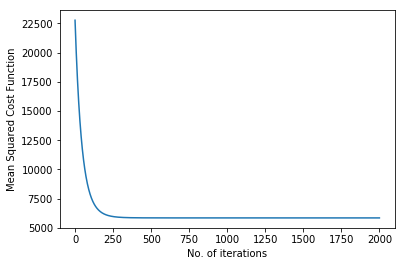

In [13]:
plt.plot(cost_record[:, 1])
plt.xlabel('No. of iterations')
plt.ylabel('Mean Squared Cost Function')
plt.show()

## Normal Equation
The coefficients for Linear Regression can also be found using the **Normal Equation**:

$$\theta = (X^T \cdot X)^{-1} X^T \cdot Y$$

Refer to the following link for the proof:
- https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/

The results we obtain is exactly the same as those returned by the LinearRegression class from sklearn!

In [14]:
theta_normal = np.linalg.inv(x.transpose() @ x) @ x.transpose() @ y
print(theta_normal)

[[-21.60818042]
 [ 40.44063024]
 [ 53.69346385]
 [ 89.21434046]
 [ 49.00840779]
 [ 50.37130485]
 [ 37.9235601 ]
 [ 62.20244247]
 [ 75.77563615]
 [ 34.227762  ]
 [ 39.18573589]]
